Import the essential Python libraries for text mining

In [2]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

Load text file and store it in the variable text.

In [3]:
path = r"...\President Moon Jae-in’s inauguration speech.txt"

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()

In [4]:
text[:100]

'Honored and beloved citizens of the Republic of Korea, thank you. I bow my head in deep gratitude fo'

**Create a tokenizer that extracts only alphanumeric characters.**
- \w matches any "word character": [a-zA-Z0-9_]
- "+" means "one or more" of these characters.
- This pattern extracts alphanumeric sequences, ignoring punctuation, symbols, etc.

In [5]:
tokenizer = RegexpTokenizer(r'[\w]+') # we don't use ! ? , " ", 

Load a list of English stopwords (common words to ignore), such as “and”, “is”, “the”.

In [6]:
stop_words = stopwords.words('english')

In [7]:
stop_words[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [ ]:
People -> people

In [8]:
words = text.lower() # make all words lowercase for consistency.
tokens = tokenizer.tokenize(words) # split the lowercase text into clean tokens (words).
tokens[:10]

['honored',
 'and',
 'beloved',
 'citizens',
 'of',
 'the',
 'republic',
 'of',
 'korea',
 'thank']

In [9]:
stopped_tokens = [i for i in tokens if i not in stop_words] # Filter out stopwords from the token list  
stopped_tokens[0:10]

['honored',
 'beloved',
 'citizens',
 'republic',
 'korea',
 'thank',
 'bow',
 'head',
 'deep',
 'gratitude']

In [10]:
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1] # Remove tokens that are only 1 character long (like “u”, “s”, “a”), 
                                                            # which are often noise.
stopped_tokens2[:10]

['honored',
 'beloved',
 'citizens',
 'republic',
 'korea',
 'thank',
 'bow',
 'head',
 'deep',
 'gratitude']

In [11]:
len(tokens), len(stopped_tokens), len(stopped_tokens2) # Show how many tokens were left before and after removing short tokens.

(1208, 598, 597)

*Count word frequencies using **pandas.Series(...).value_counts().***

In [12]:
pd.Series(stopped_tokens2).value_counts().head(10) 

president     22
people        20
korea         11
new            9
citizens       6
history        6
nation         5
election       5
must           4
presidency     4
Name: count, dtype: int64

- series.head(n) → first n rows
- series.tail(n) → last n rows
- series.sample(n) → random n rows

**Porter Stemmer** (topic modeling, TF-IDF)

In [13]:
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in stopped_tokens2]
pd.Series(stemmed_tokens).value_counts().head(10) 

presid     27
peopl      20
korea      11
new         9
citizen     7
histori     6
nation      6
polit       6
elect       5
creat       5
Name: count, dtype: int64

*Porter stemmer is very aggressive and not always readable, but it’s consistent and useful for:*
- Frequency analysis
- Search engines
- Dimensionality reduction in NLP tasks

In [15]:
from wordcloud import WordCloud # used to create word clouds.
from collections import Counter # counts the number of occurrences for each word.
import matplotlib.pyplot as plt

In [16]:
tokens = list(stopped_tokens2) # assigned from stopped_tokens2 (previously cleaned list).

freq = Counter(stopped_tokens2) # dictionary of word → frequency, used as input to WordCloud.

wc = WordCloud(width=800, height=800, background_color="white")
img = wc.generate_from_frequencies(freq).to_array()

*wc = WordCloud(...)* 
- Initializes the WordCloud generator: width=800, height=800: canvas size, background_color="white": sets the background to white

*wc.generate_from_frequencies(freq)*
- Fills the cloud based on how often each word appears in freq.

*.to_array()*
- Converts the generated word cloud into an RGB image array (numpy.ndarray), which can be displayed with matplotlib.

In [17]:
freq

Counter({'president': 22,
         'people': 20,
         'korea': 11,
         'new': 9,
         'citizens': 6,
         'history': 6,
         'nation': 5,
         'election': 5,
         'republic': 4,
         'today': 4,
         'create': 4,
         'country': 4,
         'also': 4,
         'must': 4,
         'politics': 4,
         'presidency': 4,
         'korean': 4,
         'take': 3,
         'first': 3,
         'world': 3,
         'seek': 3,
         'build': 3,
         'presidential': 3,
         'support': 3,
         'make': 3,
         'difficult': 3,
         'moon': 3,
         'jae': 3,
         'era': 3,
         'gwanghwamun': 3,
         'power': 3,
         'work': 3,
         'resolve': 3,
         'peace': 3,
         'peninsula': 3,
         'beloved': 2,
         'great': 2,
         '19th': 2,
         'sense': 2,
         'heart': 2,
         'unity': 2,
         'responsibility': 2,
         'humility': 2,
         'well': 2,
         'together':

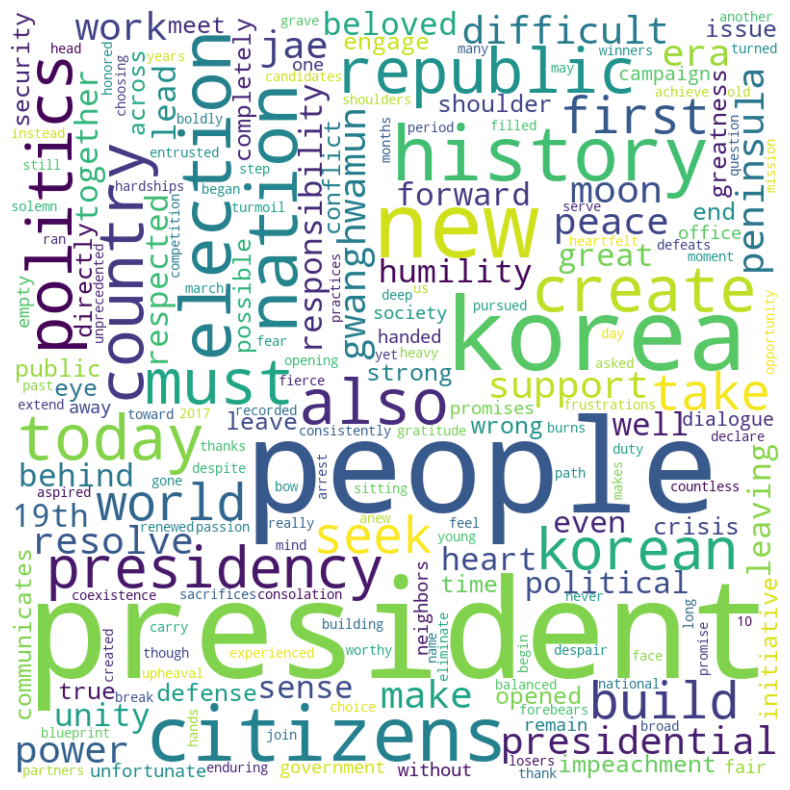

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig("wordcloud_en.png", dpi=100, bbox_inches="tight") # save the result 
plt.show()

In [21]:
from wordcloud import ImageColorGenerator
from PIL import Image # to load and manipulate images
import numpy as np

In [22]:
mask_path = r"...\President Moon.png"  
color_path = mask_path  

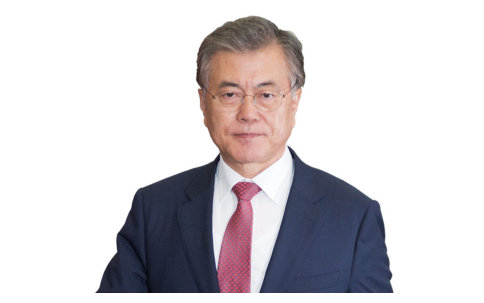

In [23]:
img = Image.open(mask_path)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [24]:
freq = Counter(stopped_tokens2)

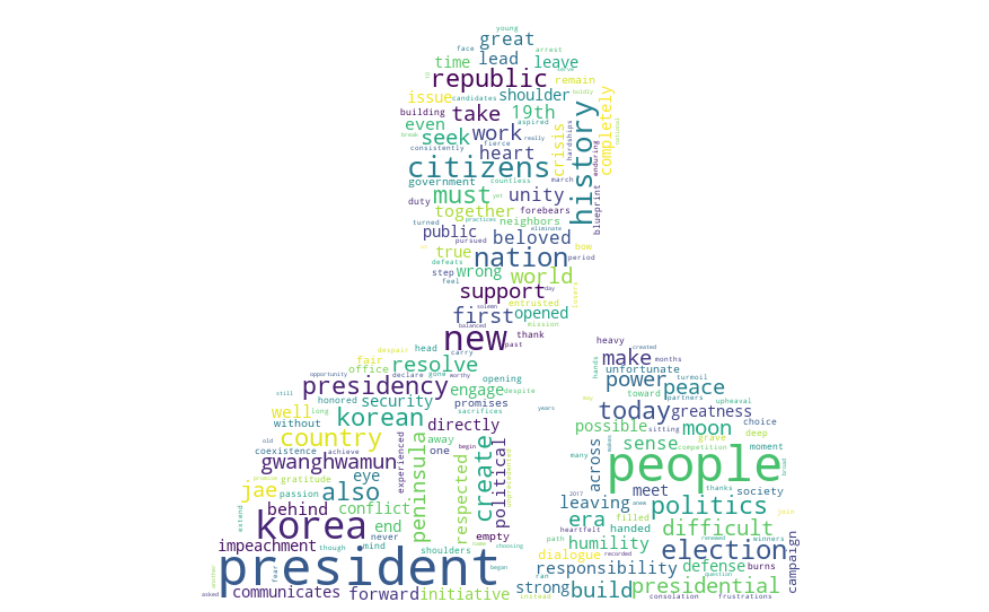

In [25]:
from PIL import Image, ImageOps # ImageOps: contains helper functions for image transformation

img = Image.open(mask_path).convert('RGBA') # A: Alpha (transparency)
bg  = Image.new('RGBA', img.size, (255, 255, 255, 255)) # replace transparent areas in the original image with white.           
composite = Image.alpha_composite(bg, img).convert('L') # Blends img over the white bg using the alpha channel.            
mask_gray = np.array(composite) # Converts the composite grayscale image into a NumPy array

mask_bin  = np.where(mask_gray > 240, 255, 0).astype(np.uint8)
# Applies a threshold filter:
# If a pixel is brighter than 240 → treat it as background → assign 255 (white)
# Else → treat it as part of the shape → assign 0 (black)

wc = WordCloud(
    width=800, height=800,
    background_color='white',
    mask=mask_bin, # Image mask applied.
    collocations=False,
)
wc.generate_from_frequencies(freq) # using the freq dictionary.
 
img = wc.to_array()
plt.figure(figsize=(10,10)); plt.imshow(img, interpolation='bilinear')
plt.axis('off'); plt.tight_layout(); plt.show()
